In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base= automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table called each by their class listed above by keys
measurement=base.classes.measurement
station=base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
#query to measurment date and order the data by the dates, and in descending order and find the last date
latestdate=session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
latestdate

'2017-08-23'

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
#from latest date subtract 365 days (1 year) to find date requested
oneyrdate= dt.date(2017,8,23) - dt.timedelta(days=365)
oneyrdate

datetime.date(2016, 8, 23)

In [11]:
# Perform a query to retrieve the data and precipitation scores 
#query the data for the time set above the date 8/23/2016 from above caluation and grab all of the data
scores=session.query(measurement.date,measurement.prcp).filter(measurement.date>=oneyrdate).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
#created df that will have take the data and only have columns for date and precipiation 
df=pd.DataFrame(scores, columns=['date', 'precipitation'])
df

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [15]:
# Sort the dataframe by date
#used the sortvalues to sort by the date, here we can see there are days that have no values so we can drop that data
sorted=df.sort_values(by="date")
sorted.head()

,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


In [17]:
#dropping NAN values
sorted=sorted.dropna(how='any')
sorted.head()

,date,precipitation
0,2016-08-23,0.00
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70


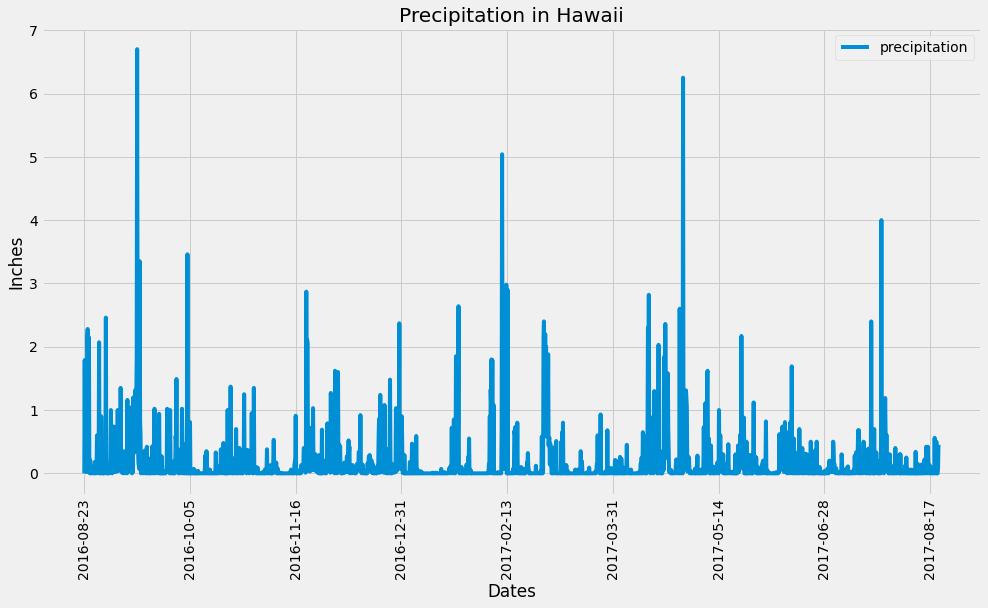

In [32]:
# Use Pandas Plotting with Matplotlib to plot the data
#using the sorted df plot the graph
sorted.plot('date', 'precipitation', figsize=(15,8), rot=90)
plt.title('Precipitation in Hawaii')
plt.xlabel('Dates')
plt.ylabel('Inches');

In [33]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#use describe to pull the summary stats for the data requested
sorted.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [39]:
# Design a query to calculate the total number stations in the dataset
#query the stations and count for a total of nine
totalstations=session.query(station.station).count()
totalstations

9

In [47]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
#query each station and count each one, then group by station, and order it by the count of data in descending order for all of the dataset
active_stations=session.query(measurement.station, func.count()).group_by(measurement.station).order_by(func.count().desc()).all()
#print for each station the count in the stations from the query above and print out all info neatly 
for station, count in active_stations:
        print(station, count)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [69]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#use the code above and instead of all just use the first station as this is the one with the most actvity 
most_active_station=session.query(measurement.station, func.count()).group_by(measurement.station).order_by(func.count().desc()).first()
#check to see correct station
most_active_station


('USC00519281', 2772)

In [76]:
#minimum temperature
#query for the min temp and filter it by the station USC00519281 
mintemp= session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

[(54.0,)]

# Minimum Temperature for Station USC00519281


In [78]:
mintemp

[(54.0,)]

In [79]:
maxtemp= session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

# Maximum Temperature for Station USC00519281

In [83]:
maxtemp

[(85.0,)]

In [90]:
avgtemp= session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

# Average Temperature for Station USC00519281

In [87]:
avgtemp

[(71.66378066378067,)]

In [93]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#query the station and temperature and filter by the dates on and before 8/23/16 and filter it by the station id USC00519281 for all the data
observations=session.query(measurement.station, measurement.tobs).filter(measurement.date>= '2016-08-23').filter(measurement.station == 'USC00519281').all()
observations


[('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281',

In [104]:
#create dataframe to make a histogram
observationsdf=pd.DataFrame(observations, columns = ['date', 'tobs'])
observationsdf.head()

,date,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


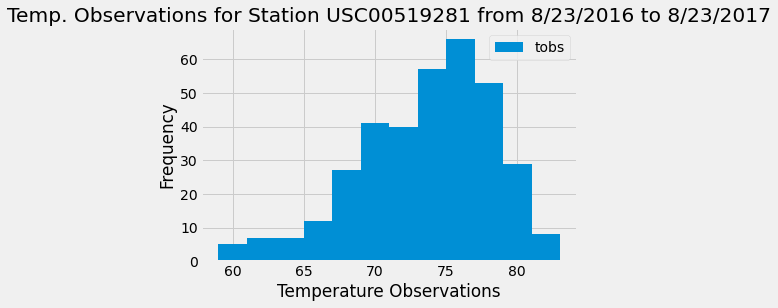

In [103]:
observationsdf.plot.hist(bins=12)
plt.title('Temp. Observations for Station USC00519281 from 8/23/2016 to 8/23/2017')
plt.xlabel('Temperature Observations');


# Close session

In [105]:
# Close Session
session.close()